In [1]:
from production import Worldline, local_move, Problem, ExactSolver
import numpy as np
from tqdm.notebook import tqdm

In [2]:
rng = np.random.default_rng(7)

In [3]:
pb = Problem(n_sites=8, J_x=100.0, J_z=1.0, temperature=5, m=10)
np.tanh(pb.delta_tau * pb.J_x / 2), pb.delta_tau


(np.float64(0.7615941559557649), 0.02)

In [4]:
solver = ExactSolver(pb)
solver.energy

np.complex128(-261.4754777154994+0j)

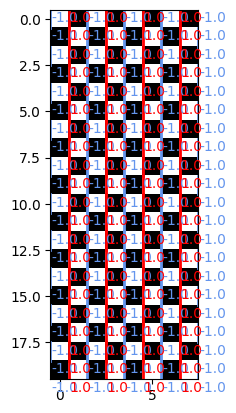

In [5]:
spins = np.ones((2 * pb.m, pb.n_sites))
for i in range(0, pb.n_sites, 2):
    spins[:, i] *= -1

wl = Worldline(pb, spins)
wl.draw(wl.spins)

In [6]:
for _ in tqdm(range(10_000)):
    local_move(wl, rng)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [7]:
n_cycles = 3_000
length_cycle = 2 * pb.m * pb.n_sites
energies = np.zeros(n_cycles)
weights = np.zeros(n_cycles)

for i in tqdm(range(n_cycles)):
    for _ in range(length_cycle):
        local_move(wl, rng, switch_propa=0.2)
    energies[i] = wl.energy
    weights[i] = wl.weight

  0%|          | 0/3000 [00:00<?, ?it/s]

In [8]:
energy = np.mean(energies)
print(energy)

-271.35437941571394


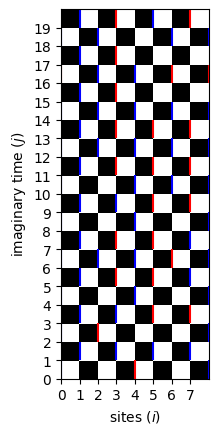

In [ ]:
import matplotlib.pyplot as plt

m = wl.problem.m
n = wl.problem.n_sites

plt.xticks(range(n))
plt.yticks(range(2 * m))
# plt.grid()
plt.xlim(0, n)
plt.ylim(0, 2 * m)

ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("sites ($i$)")
ax.set_ylabel("imaginary time ($j$)")

spins = wl.spins

tiles = np.zeros((2 * m, n))
for j in range(2 * m):
    for i in range(n):
        tiles[j, i] = (
            i + j % 2 + 1
        ) % 2  # checkerboard pattern for better visibility

plt.imshow(
    tiles,
    cmap="gray",
    interpolation="nearest",
    vmin=0,
    vmax=1,
    extent=(0, n, 2 * m, 0),
)

for j in range((2 * m) + 1):
    for base_i in range((n // 2) + 1):
        i = 2 * base_i + (j % 2)

        bot_left = np.array([j, i])
        bot_right = np.array([j, i + 1])
        top_right = np.array([j + 1, i + 1])
        top_left = np.array([j + 1, i])
        center = np.array([j + 0.5, i + 0.5])

        if spins[bot_left[0] % (2*m), bot_left[1] % n] == spins[top_left[0] % (2*m), top_left[1] % n]:
            c = "r" if spins[bot_left[0] % (2*m), bot_left[1] % n] == 1 else "b"
            plt.vlines(i, j, j+1, colors=c)
        if spins[bot_right[0] % (2*m), bot_right[1] % n] == spins[top_right[0] % (2*m), top_right[1] % n]:
            c = "r" if spins[bot_right[0] % (2*m), bot_right[1] % n] == 1 else "b"
            plt.vlines(i, j, j+1, colors=c)
plt.show()